In [11]:
%load_ext autoreload
%autoreload 2
%matplotlib inline  

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch

from func2graph import data, models, tools

torch.Size([10, 30000])


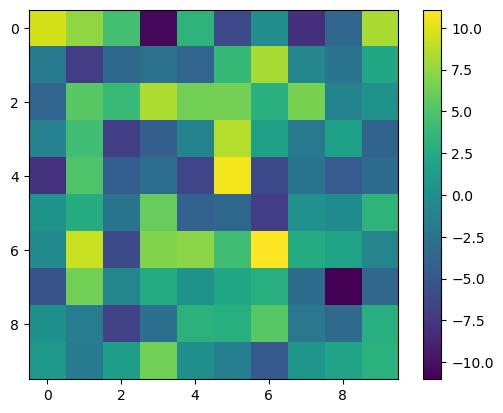

In [13]:
neuron_num = 10
dt = 0.001
tau = 0.3

spike_neuron_num = 2
spike_input = 5

weight_scale = 5
init_scale = 0.1

total_time = 30000
random_seed = 42

train_data_size = 20000
window_size = 200
batch_size = 32

trainloader, validloader, weight_matrix = data.generate_simulation_data(
    neuron_num=neuron_num,
    dt=dt,
    tau=tau,
    total_time=total_time,
    spike_neuron_num=spike_neuron_num,
    spike_input=spike_input,
    train_data_size=train_data_size,
    window_size=window_size,
    random_seed=random_seed,
    batch_size=batch_size,
    weight_scale=weight_scale,
    init_scale=init_scale,
)

plt.imshow(weight_matrix.detach().numpy())
plt.colorbar()
plt.show()

In [14]:
hidden_size_1=128
h_layers_1=2
heads=1
attention_layers=1
hidden_size_2=64
h_layers_2=2

predict_mode_model = models.Attention_Autoencoder(
    neuron_num=neuron_num,
    window_size=window_size,
    hidden_size_1=hidden_size_1,
    h_layers_1=h_layers_1,
    heads=heads,
    attention_layers=attention_layers,
    hidden_size_2=hidden_size_2,
    h_layers_2=h_layers_2,
    prediction_mode=True,     ########################
    pos_enc_type="lookup_table",   ########################
)

In [15]:
checkpoint_path = "../../checkpoints/lookup_table/epoch=24-step=15625.ckpt"
predictions, ground_truths, avg_attention, attentions = tools.get_avg_attention(validloader, predict_mode_model, checkpoint_path, neuron_num)

print(predictions.shape)
print(ground_truths.shape)
print(avg_attention.shape)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA RTX A4000') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
Restoring states from the checkpoint path at ../../checkpoints/lookup_table/epoch=24-step=15625.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
Loaded model weights from the checkpoint at ../../checkpoints/lookup_table/epoch=24-step=15625.ckpt


Predicting DataLoader 0:   0%|          | 0/182 [00:00<?, ?it/s]1
2
3
Predicting DataLoader 0:   1%|          | 1/182 [00:00<00:27,  6.66it/s]1
2
3
Predicting DataLoader 0:   1%|          | 2/182 [00:00<00:13, 12.88it/s]1
2
3
Predicting DataLoader 0:   2%|▏         | 3/182 [00:00<00:09, 18.72it/s]1
2
3
Predicting DataLoader 0:   2%|▏         | 4/182 [00:00<00:07, 24.25it/s]1
2
3
Predicting DataLoader 0:   3%|▎         | 5/182 [00:00<00:06, 29.45it/s]1
2
3
Predicting DataLoader 0:   3%|▎         | 6/182 [00:00<00:05, 34.35it/s]1
2
3
Predicting DataLoader 0:   4%|▍         | 7/182 [00:00<00:04, 38.99it/s]1
2
3
Predicting DataLoader 0:   4%|▍         | 8/182 [00:00<00:04, 43.41it/s]1
2
3
Predicting DataLoader 0:   5%|▍         | 9/182 [00:00<00:03, 47.60it/s]1
2
3
Predicting DataLoader 0:   5%|▌         | 10/182 [00:00<00:03, 51.56it/s]1
2
3
Predicting DataLoader 0:   6%|▌         | 11/182 [00:00<00:03, 55.23it/s]1
2
3
Predicting DataLoader 0:   7%|▋         | 12/182 [00:00<00:02, 58.81it

PREDICT Profiler Report

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Action                                                                                                                                                      	|  Mean duration (s)	|  Num calls      	|  Total time (s) 	|  Percentage %   	|
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Total                                                                                                                                                       	|  -              	|  2579           	|  2.5634         	

(5801, 10, 200)
(5801, 10, 200)
(10, 10)


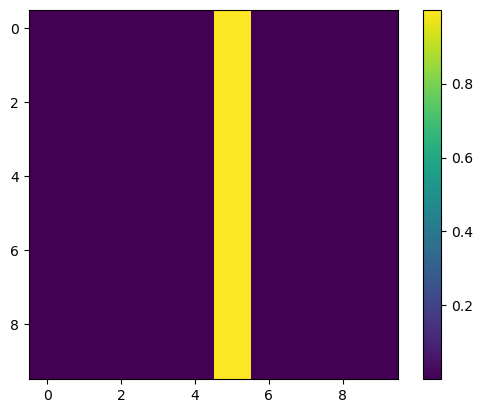

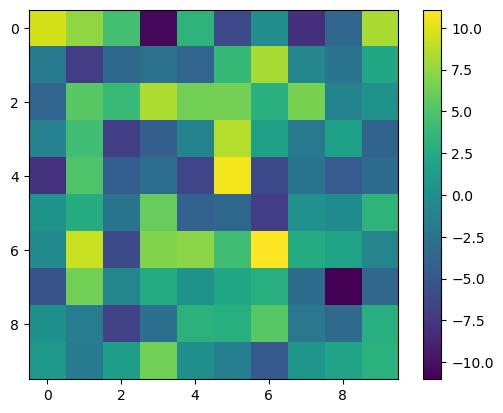

In [16]:
plt.imshow(avg_attention)
plt.colorbar()
plt.show()

plt.imshow(weight_matrix.detach().numpy())
plt.colorbar()
plt.show()

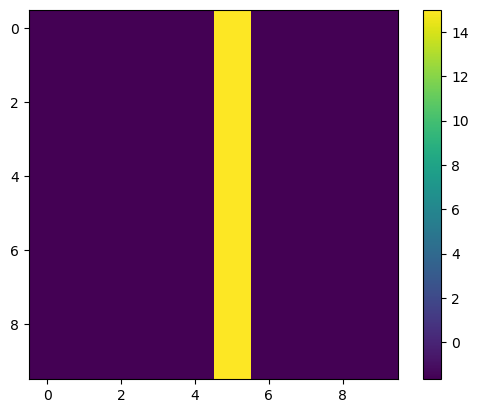

In [17]:
# Normalize
mean = np.mean(avg_attention)
std = np.std(avg_attention)
normalized_avg_attention = (avg_attention - mean) / std

plt.imshow(normalized_avg_attention*weight_scale)
plt.colorbar()
plt.show()

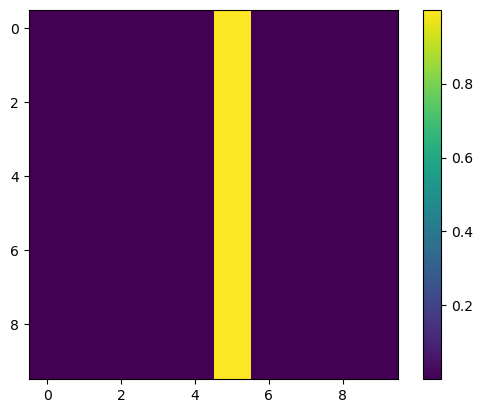

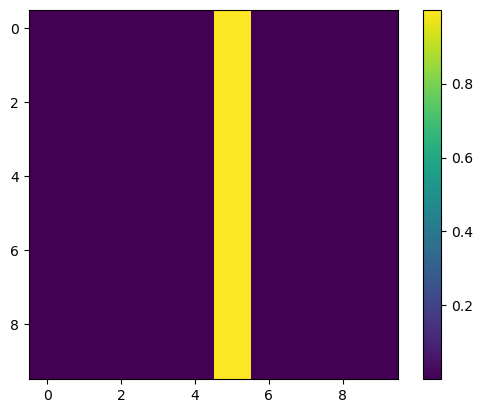

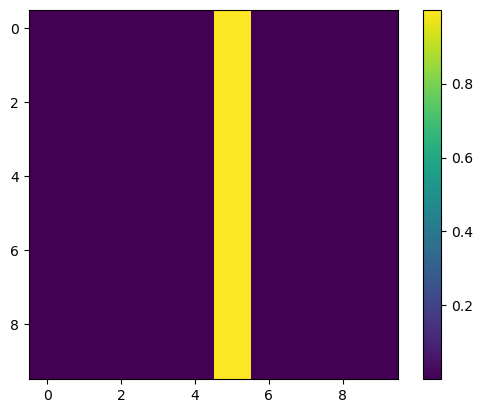

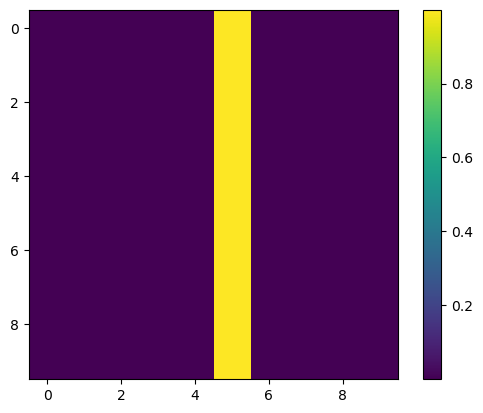

In [18]:
plt.imshow(attentions[0])
plt.colorbar()
plt.show()

plt.imshow(attentions[10])
plt.colorbar()
plt.show()

plt.imshow(attentions[100])
plt.colorbar()
plt.show()

plt.imshow(attentions[500])
plt.colorbar()
plt.show()

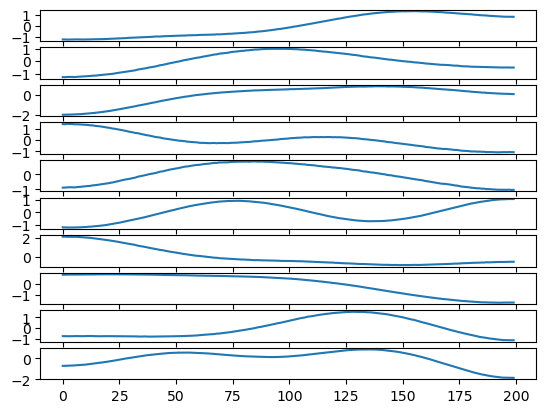

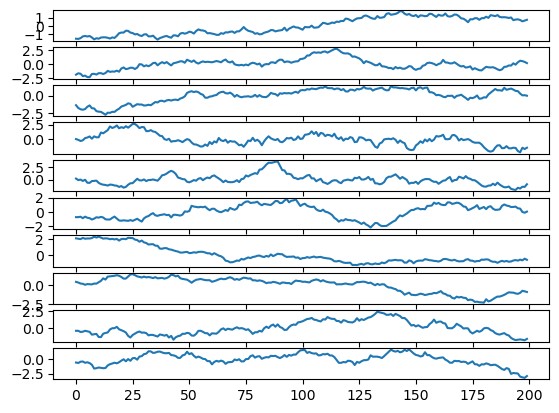

In [19]:
for i in range(neuron_num):
    plt.subplot(10, 1, i+1)
    plt.plot(predictions[1][i])
plt.show()

for i in range(neuron_num):
    plt.subplot(10, 1, i+1)
    plt.plot(ground_truths[1][i])
plt.show()